In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
df= pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\Election_Data csv.csv')
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [56]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [4]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [5]:
df.shape

(1525, 9)

In [60]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [7]:
df.drop_duplicates(inplace=True) 

In [8]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [112]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [9]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


In [65]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

Text(0.5, 1.0, 'Blair boxplot')

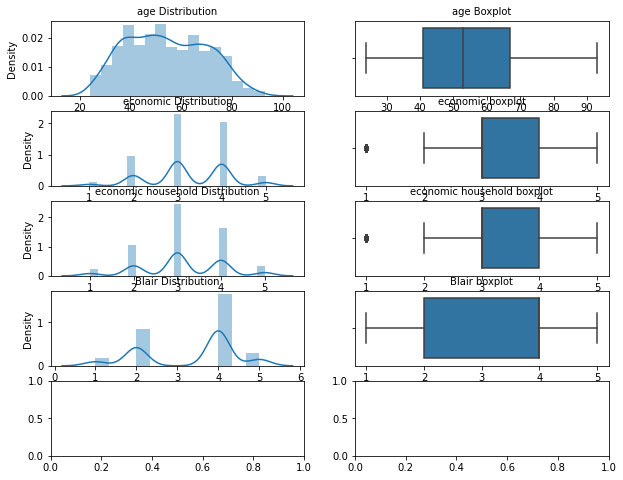

In [115]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,8)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and 

Text(0.5, 1.0, 'political knowledge boxplot')

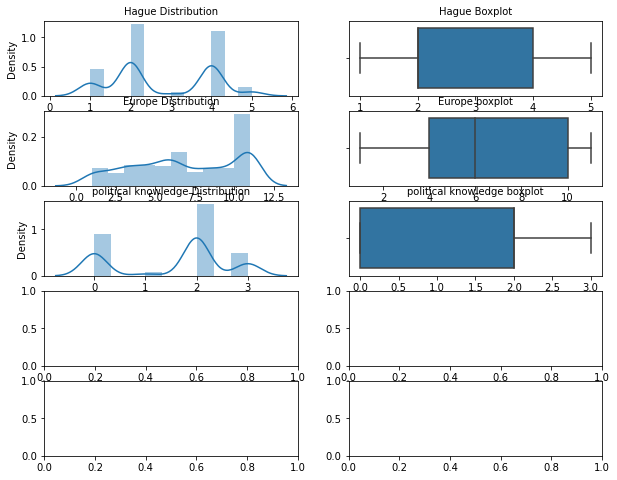

In [67]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,8)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

<AxesSubplot:xlabel='vote', ylabel='count'>

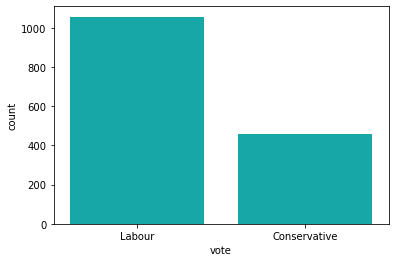

In [13]:
sns.countplot(x="vote", data=df, color="c")

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

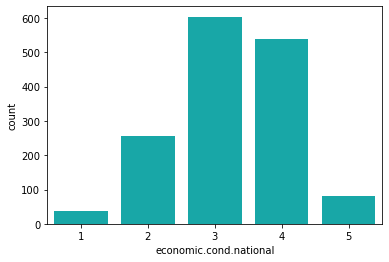

In [14]:
sns.countplot(x="economic.cond.national", data=df, color="c")

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

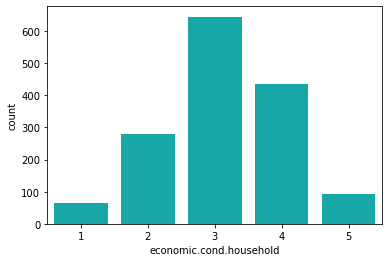

In [15]:
sns.countplot(x="economic.cond.household", data=df, color="c")

<AxesSubplot:xlabel='Blair', ylabel='count'>

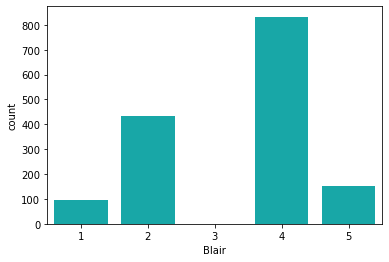

In [16]:
sns.countplot(x="Blair", data=df, color="c")

<AxesSubplot:xlabel='Hague', ylabel='count'>

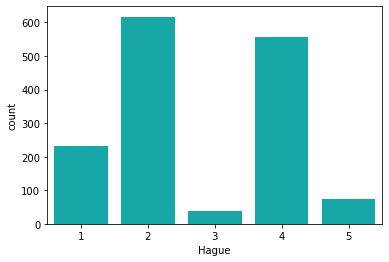

In [17]:
sns.countplot(x="Hague", data=df, color="c")

<AxesSubplot:xlabel='Europe', ylabel='count'>

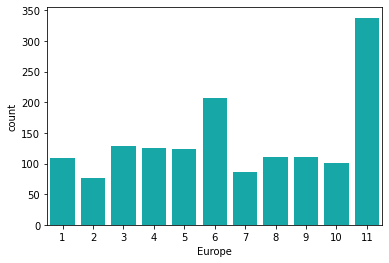

In [18]:
sns.countplot(x="Europe", data=df, color="c")

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

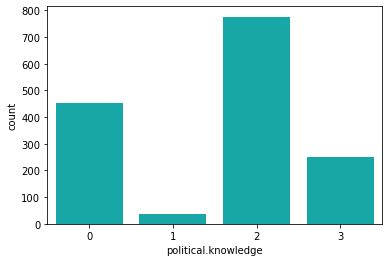

In [19]:
sns.countplot(x="political.knowledge", data=df, color="c")

<AxesSubplot:xlabel='gender', ylabel='count'>

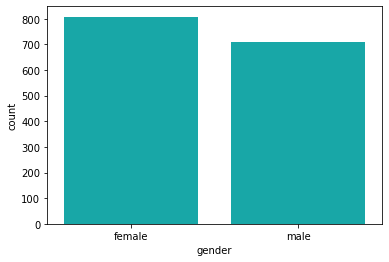

In [20]:
sns.countplot(x="gender", data=df, color="c")

<AxesSubplot:xlabel='vote', ylabel='age'>

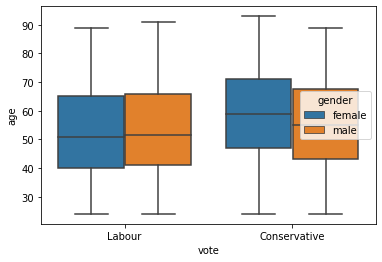

In [23]:
sns.boxplot(data = df, x='vote',y='age', hue='gender')


<AxesSubplot:xlabel='economic.cond.national', ylabel='age'>

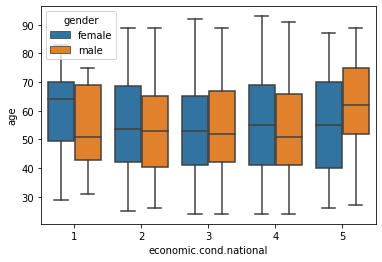

In [24]:
sns.boxplot(data = df, x='economic.cond.national',y='age', hue='gender')


<AxesSubplot:xlabel='economic.cond.household', ylabel='age'>

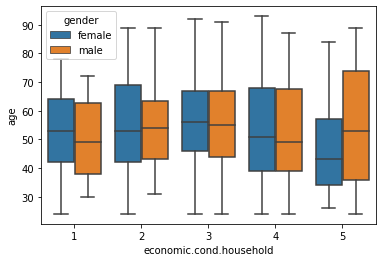

In [25]:
sns.boxplot(data = df, x='economic.cond.household',y='age', hue='gender')


<AxesSubplot:xlabel='Blair', ylabel='age'>

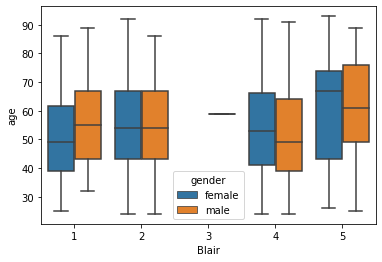

In [26]:
sns.boxplot(data = df, x='Blair',y='age', hue='gender')


<AxesSubplot:xlabel='Europe', ylabel='age'>

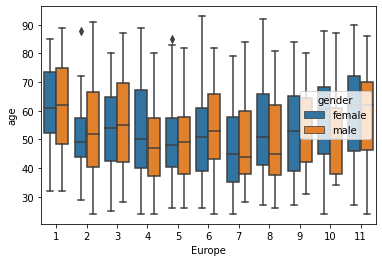

In [27]:
sns.boxplot(data = df, x='Europe',y='age', hue='gender')


<AxesSubplot:xlabel='political.knowledge', ylabel='age'>

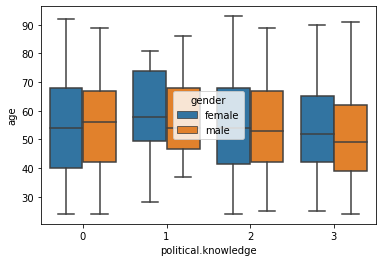

In [28]:
sns.boxplot(data = df, x='political.knowledge',y='age', hue='gender')


<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

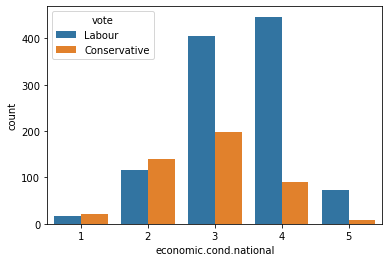

In [29]:
sns.countplot(data = df, x='economic.cond.national', hue='vote')

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

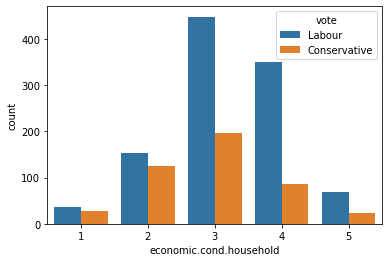

In [30]:
sns.countplot(data = df, x='economic.cond.household', hue='vote')

<AxesSubplot:xlabel='Blair', ylabel='count'>

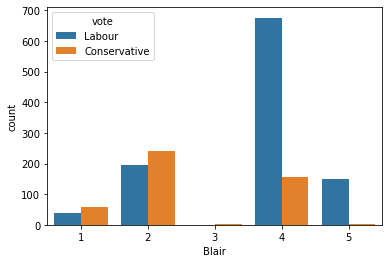

In [32]:
sns.countplot(data = df, x='Blair', hue='vote')

<AxesSubplot:xlabel='Hague', ylabel='count'>

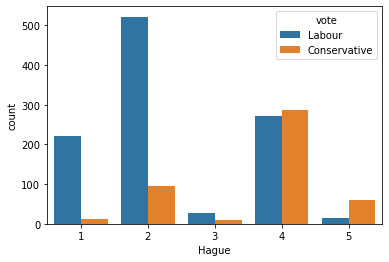

In [33]:
sns.countplot(data = df, x='Hague', hue='vote')

<AxesSubplot:xlabel='Europe', ylabel='count'>

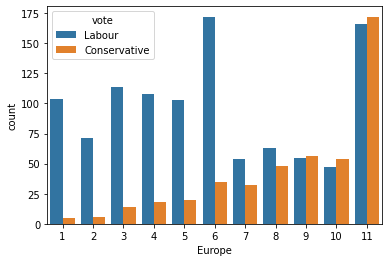

In [34]:
sns.countplot(data = df, x='Europe', hue='vote')

<AxesSubplot:xlabel='gender', ylabel='count'>

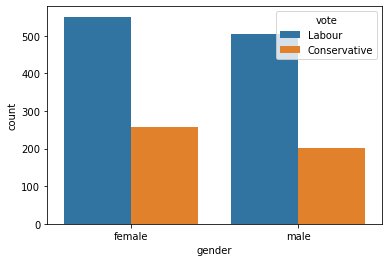

In [36]:
sns.countplot(data = df, x='gender', hue='vote')

<AxesSubplot:xlabel='economic.cond.national', ylabel='vote'>

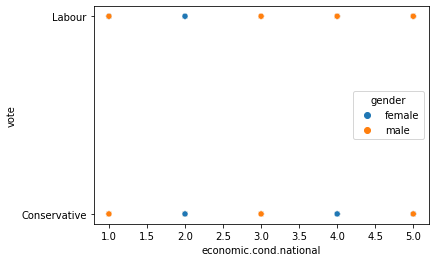

In [22]:
sns.scatterplot(data = df, x='economic.cond.national',y='vote', hue = 'gender')

<AxesSubplot:>

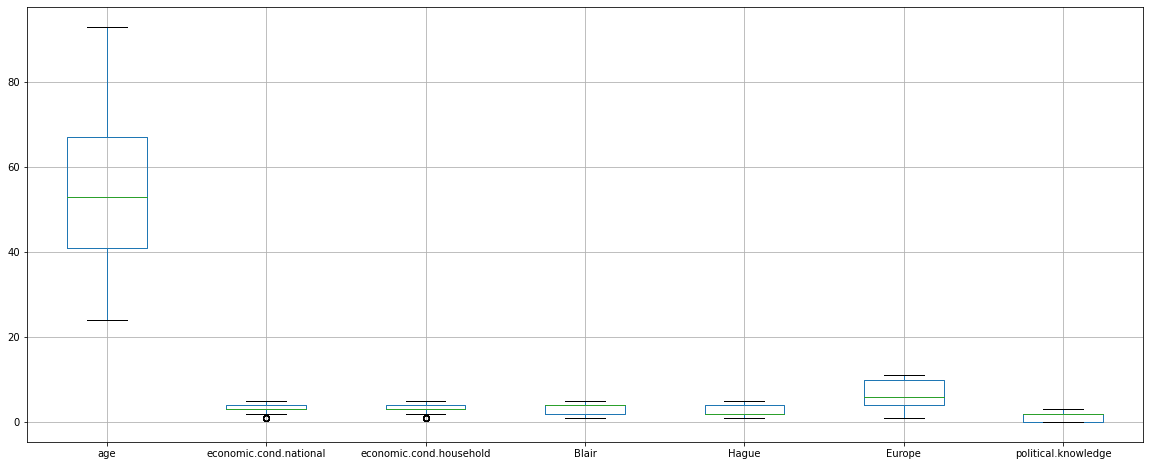

In [24]:
plt.figure(figsize = (20,8))
df.boxplot()

In [25]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [26]:
df.kurt()

age                       -0.943708
economic.cond.national    -0.256575
economic.cond.household   -0.209035
Blair                     -1.060248
Hague                     -1.395161
Europe                    -1.236843
political.knowledge       -1.222260
dtype: float64

In [139]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [28]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic.cond.national'}>,
        <AxesSubplot:title={'center':'economic.cond.household'}>],
       [<AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>,
        <AxesSubplot:title={'center':'Europe'}>],
       [<AxesSubplot:title={'center':'political.knowledge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

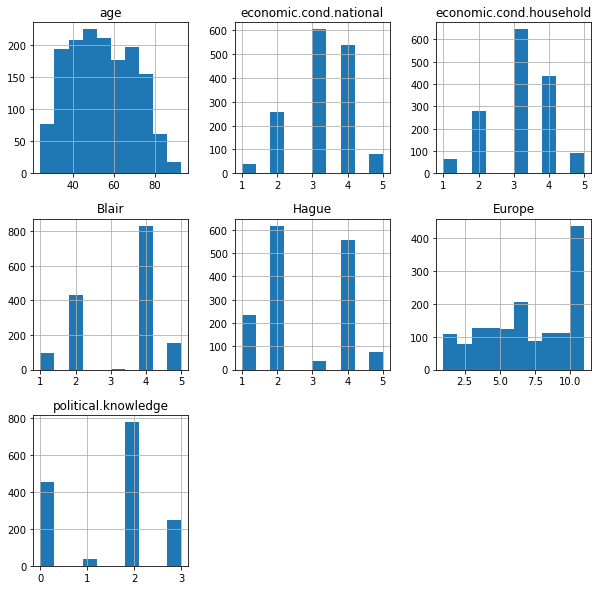

In [29]:
df.hist(figsize=(10,10))

In [30]:
# Bivariate and Multivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


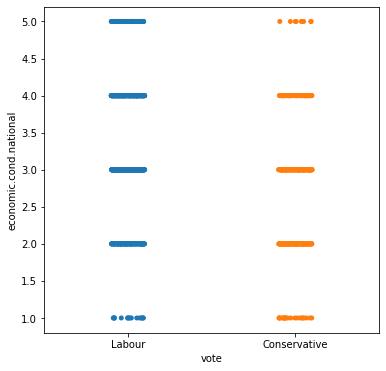

In [31]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


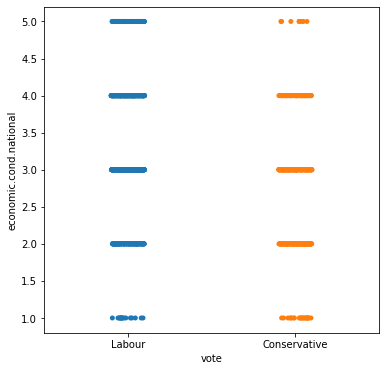

In [32]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"],df['economic.cond.national'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


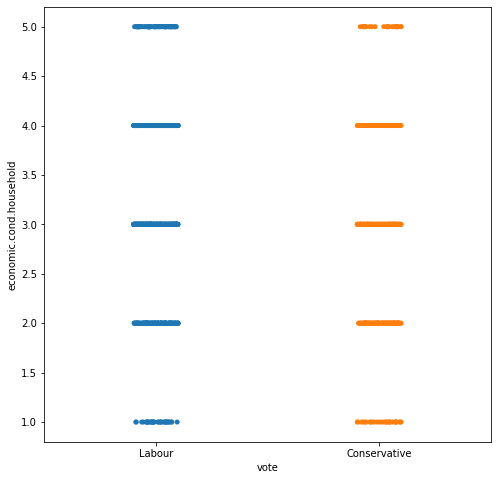

In [33]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


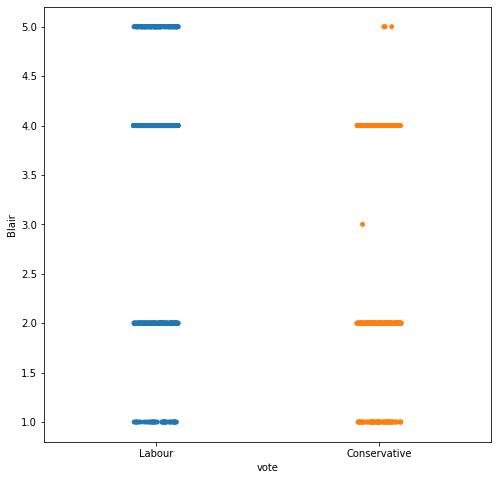

In [34]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"],df['Blair'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


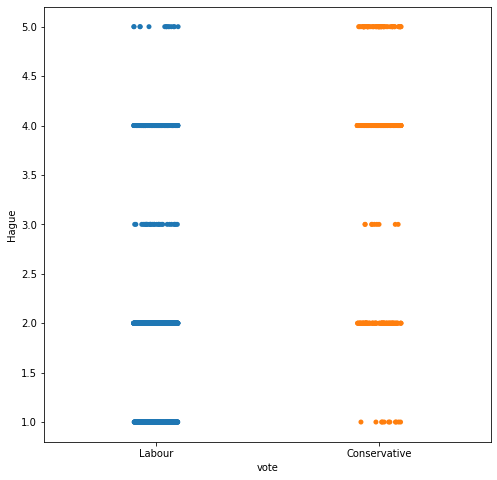

In [35]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


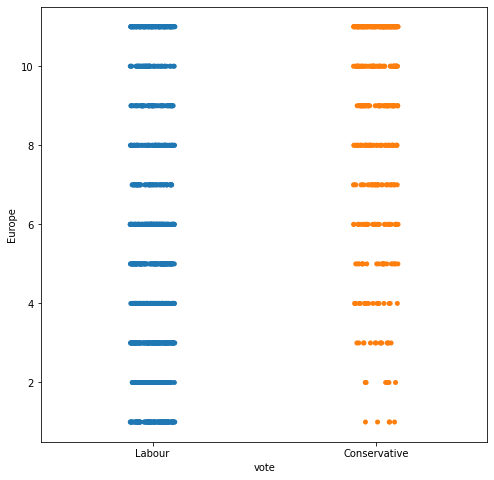

In [36]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


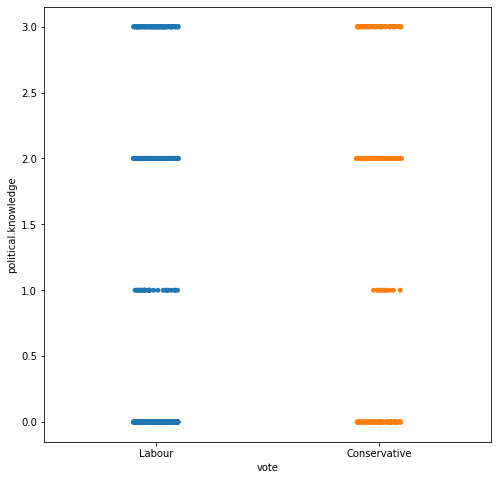

In [37]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], 
              df['political.knowledge'], jitter=True) 
plt.show()

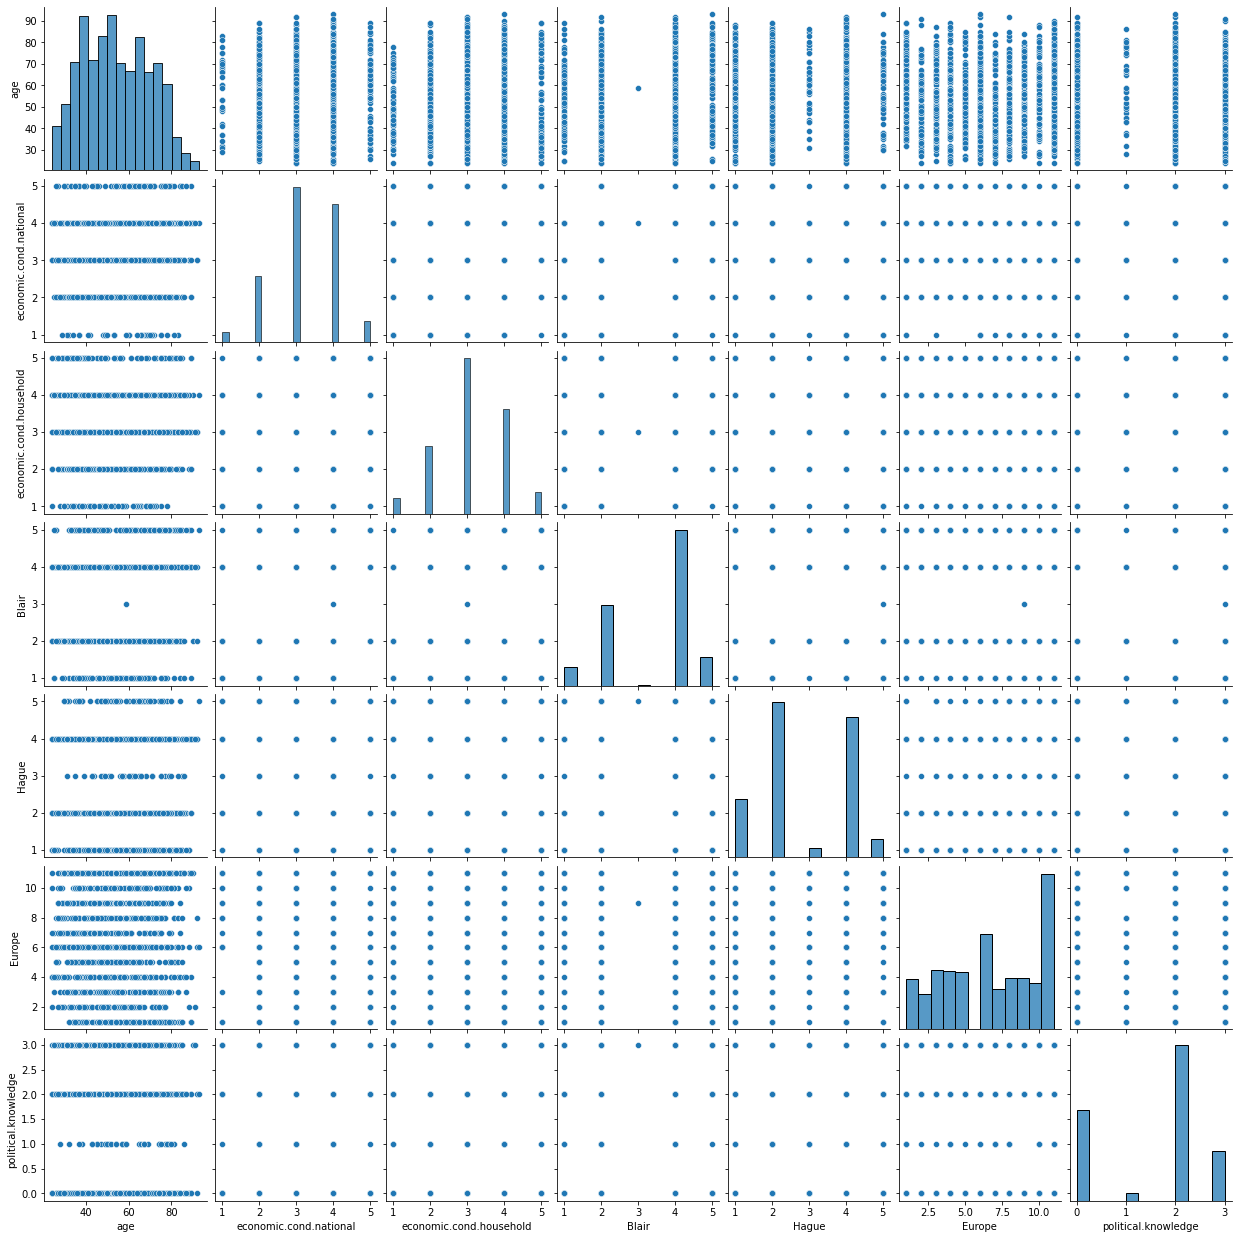

In [38]:
sns.pairplot(df)

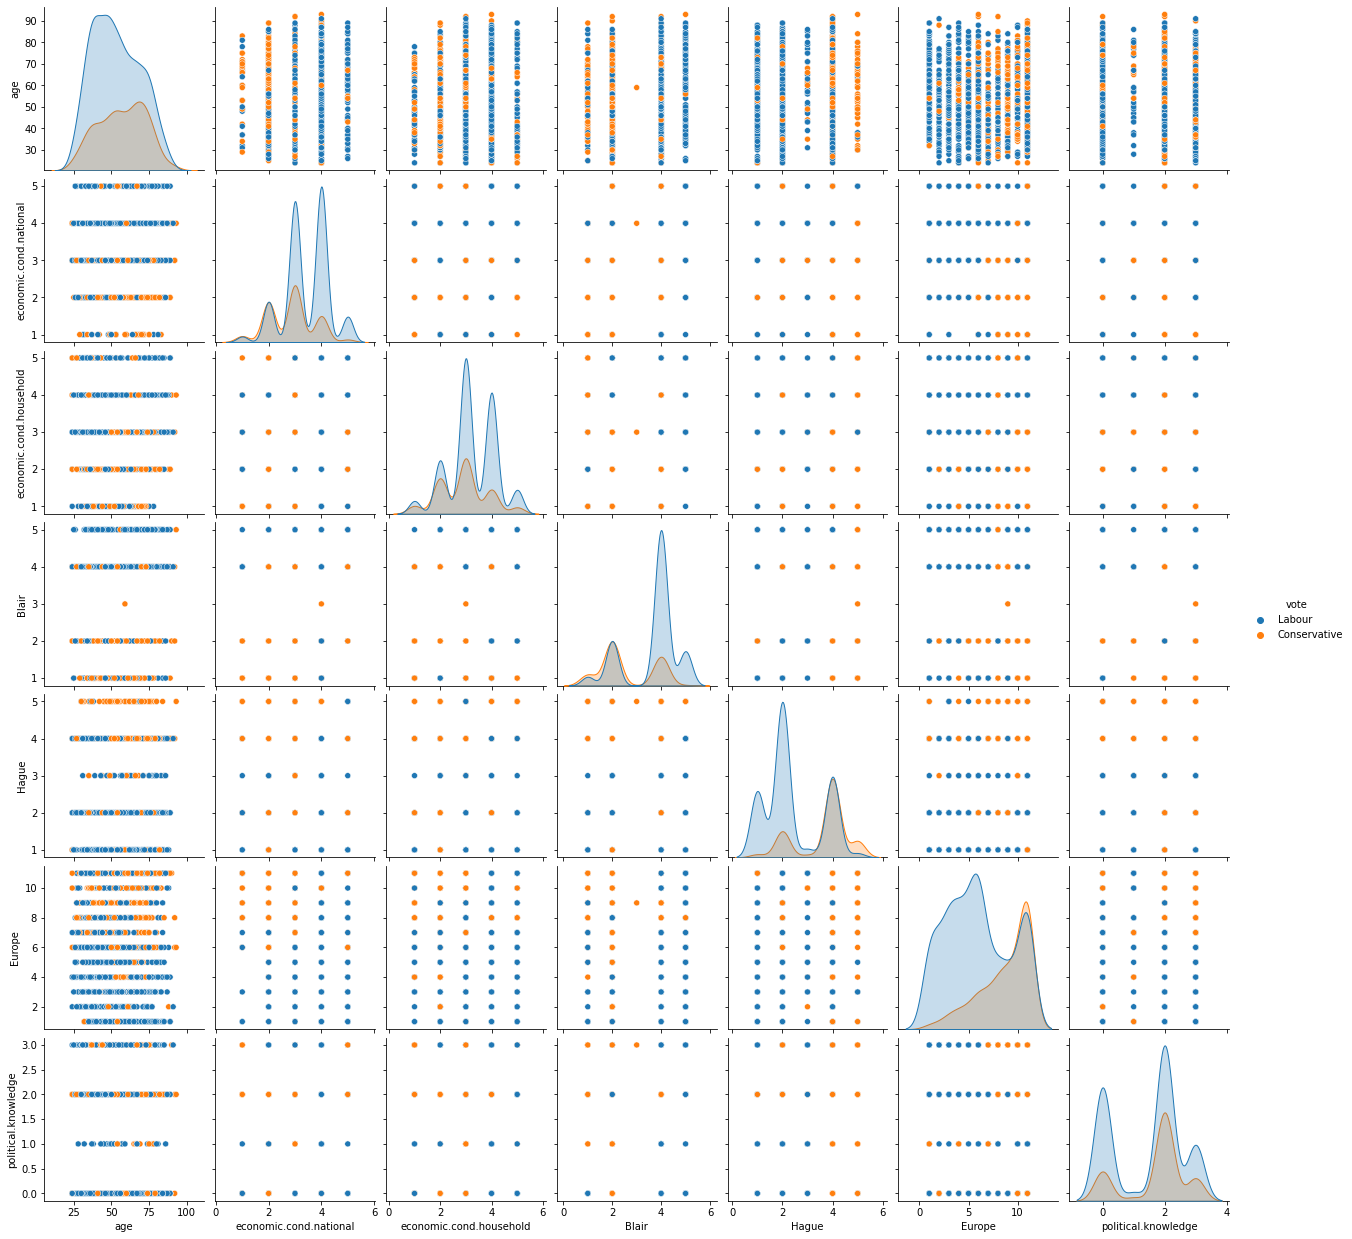

In [39]:
sns.pairplot(df, hue='vote')

<AxesSubplot:>

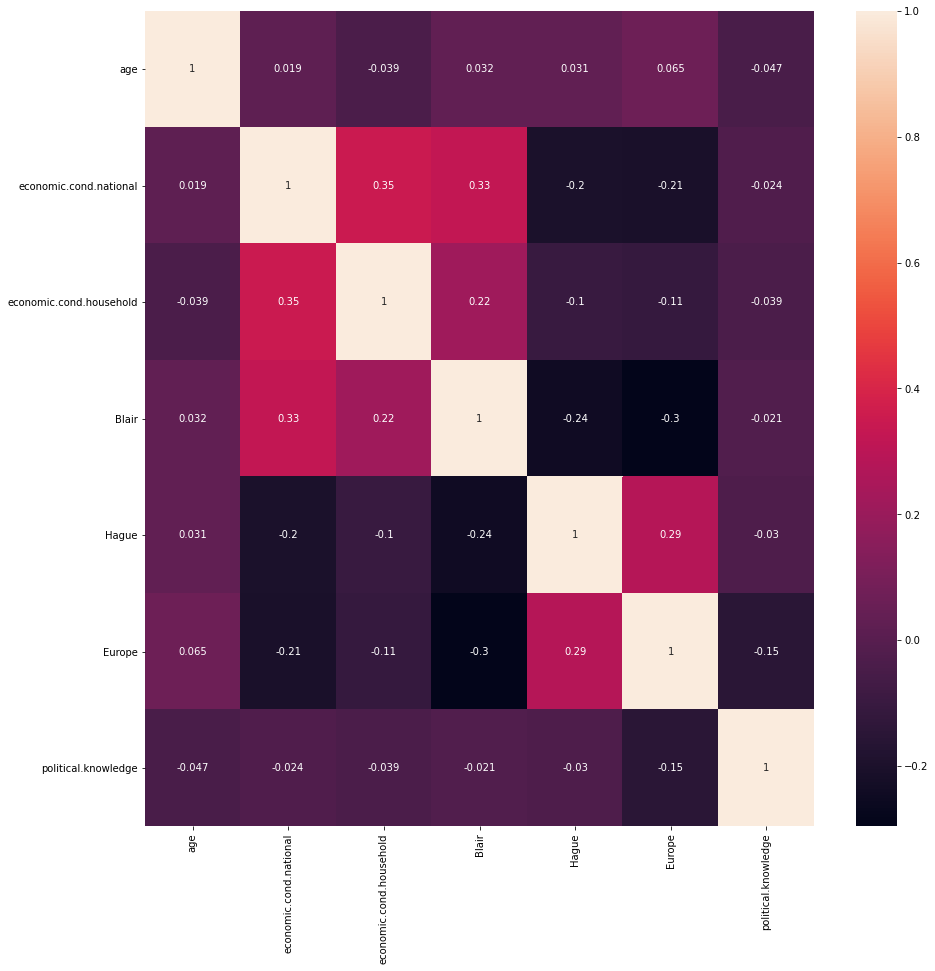

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [10]:
correl = df.corr()
correl

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


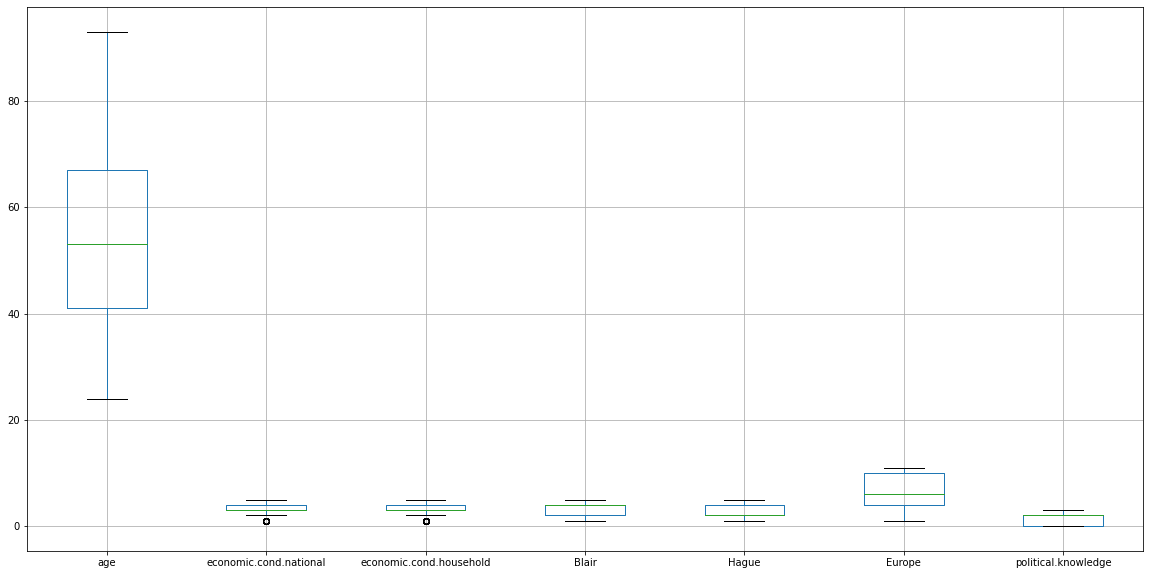

In [11]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [12]:
cat1 = ['vote', 'gender']

In [13]:
df1 =pd.get_dummies(df, columns=cat1,drop_first=True)
df1

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


In [14]:
df1= df1.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [15]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [16]:
# Logistic Regression Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [99]:
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [17]:
import statsmodels.formula.api as sm

X=df1.drop('IsLabour_or_not',axis=1)
y=df1['IsLabour_or_not']

In [18]:
X.head().T

,0,1,2,3,4
age,43,36,35,24,41
economic.cond.national,3,4,4,4,2
economic.cond.household,3,4,4,2,2
Blair,4,4,5,2,1
Hague,1,4,2,1,1
Europe,2,5,3,4,6
political.knowledge,2,2,2,0,2
IsMale_or_not,0,1,1,0,1


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: IsLabour_or_not, dtype: uint8

In [20]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


In [21]:
X_train.head().T

,991,1274,649,677,538
age,34,40,61,47,44
economic.cond.national,2,4,4,3,5
economic.cond.household,4,3,3,3,3
Blair,1,4,4,4,4
Hague,4,4,4,2,2
Europe,11,6,7,11,8
political.knowledge,2,0,2,0,0
IsMale_or_not,0,1,0,1,1


In [22]:
y_test.head()


504     1
369     1
1075    1
1031    0
1329    1
Name: IsLabour_or_not, dtype: uint8

In [23]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',1061+456)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)
Total Obs 1517


In [24]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [120]:
# Model Tuning , Bagging and Boosting. Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [142]:
# Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [30]:
# Performance Matrix on train data set
ytrain_predict_BG = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict_BG))
print(metrics.classification_report(y_train, ytrain_predict_BG))

0.9679547596606974
[[277  30]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [145]:
# Performance Matrix on test data set
ytest_predict_BG = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_BG))
print(metrics.classification_report(y_test, ytest_predict_BG))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [146]:
# Comparison of AUC and ROC for training and test data

AUC for training data: 0.997
AUC for test data: 0.997


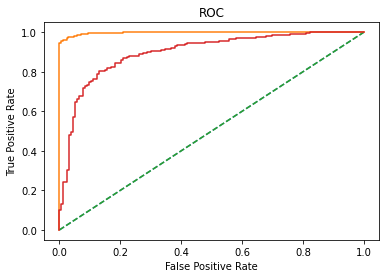

In [147]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [148]:
# Ada Boost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [150]:
## Performance Matrix on train data set
ytrain_predict_ADB = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict_ADB))
print(metrics.classification_report(y_train, ytrain_predict_ADB))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [151]:
# Performance Matrix on test data set
ytest_predict_ADB = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_ADB))
print(metrics.classification_report(y_test, ytest_predict_ADB))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [152]:
# Comparison of AUC and ROC for training and test data

AUC for training data: 0.915
AUC for test data: 0.915


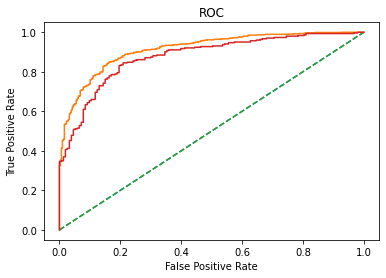

In [153]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [32]:
ADB_model_score=get_metrics_score(ADB_model)

Accuracy on training set :  0.8501413760603205
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8844884488448845
Precision on training set :  0.8809218950064021
Precision on test set :  0.8427672955974843


In [155]:
# Gradient Boost Classifier"

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [157]:
# Performance Matrix on train data set
ytrain_predict_gbcl = gbcl_model.predict(X_train)
model_score = gbcl_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict_gbcl))
print(metrics.classification_report(y_train, ytrain_predict_gbcl))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [158]:
## Performance Matrix on test data set
ytest_predict_gbcl = gbcl_model.predict(X_test)
model_score = gbcl_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_gbcl))
print(metrics.classification_report(y_test, ytest_predict_gbcl))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [159]:
# Comparison of AUC and ROC for training and test data

AUC for training data: 0.951
AUC for test data: 0.951


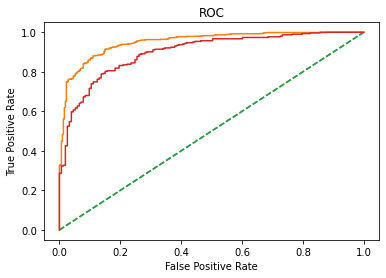

In [160]:
# predict probabilities
probs = gbcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# predict probabilities
probs = gbcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [34]:
gbcl_model_score=get_metrics_score(gbcl_model)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9389920424403183
Recall on test set :  0.9108910891089109
Precision on training set :  0.9123711340206185
Precision on test set :  0.8518518518518519


In [ ]:
# Hyperparameter Tuning
# Applying GridSearchCV for Logistic Regression

In [45]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [46]:
LR_model_tuned = LogisticRegression(max_iter=10000,n_jobs=2)
LR_model_tuned.fit(X_train,y_train)

LogisticRegression(max_iter=10000, n_jobs=2)

In [47]:
grid_search = GridSearchCV(estimator = LR_model_tuned, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [166]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=1e-05)


In [54]:
best_model_LR = grid_search.best_estimator_

In [55]:
# Prediction on the training set
ytrain_predict_LR_tuned = best_model_LR.predict(X_train)
ytest_predict_LR_tuned = best_model_LR.predict(X_test)

In [56]:
# Performance Matrix on train data set
ytrain_predict_LR_tuned = best_model_LR.predict(X_train)
model_score = best_model_LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict_LR_tuned))
print(metrics.classification_report(y_train, ytrain_predict_LR_tuned))

0.8322337417530632
[[196 111]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [57]:
#Performance Matrix on test data set
ytest_predict_LR_tuned = best_model_LR.predict(X_test)
model_score = best_model_LR.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_LR_tuned))
print(metrics.classification_report(y_test, ytest_predict_LR_tuned))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [58]:
LR_model_tuned_score=get_metrics_score(LR_model_tuned)

Accuracy on training set :  0.8312912346842601
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9098143236074271
Recall on test set :  0.8844884488448845
Precision on training set :  0.8607277289836889
Precision on test set :  0.8701298701298701


In [106]:
LR_model_score=get_metrics_score(LR_model)

Accuracy on training set :  0.8312912346842601
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9098143236074271
Recall on test set :  0.8844884488448845
Precision on training set :  0.8607277289836889
Precision on test set :  0.8701298701298701


In [173]:
# Model tuning on KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
KNN_model.fit(X_train,y_train)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
KNN_model.fit(X_train,y_train)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

#(k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')
KNN_model.fit(X_train,y_train)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.7894736842105263
Accuracy Score for K=5 is  0.8157894736842105
Accuracy Score for K=9 is  0.8048245614035088


In [61]:
# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
ytest_predict_KNN = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
ytest_predict_KNN = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8048245614035088
Accuracy Score for K=5 is  0.8157894736842105
Accuracy Score for K=9 is  0.8048245614035088


In [62]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17324561403508776,
 0.19517543859649122,
 0.19956140350877194,
 0.19956140350877194,
 0.1907894736842105,
 0.20394736842105265,
 0.19736842105263153]

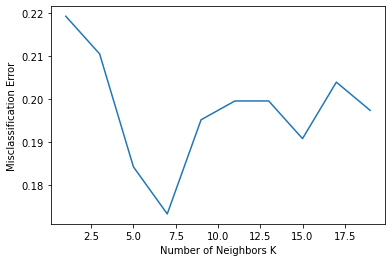

In [63]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [178]:
# Model Tuning on Adaboost Classifier

In [66]:
# Choose the type of classifier. 
ADB_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ADB_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ADB_tuned.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [67]:
ADB_tuned_score=get_metrics_score(ADB_tuned)

Accuracy on training set :  0.8463713477851084
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8778877887788779
Precision on training set :  0.8764331210191083
Precision on test set :  0.8471337579617835


In [68]:
ADB_model_score=get_metrics_score(ADB_model)

Accuracy on training set :  0.8501413760603205
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8844884488448845
Precision on training set :  0.8809218950064021
Precision on test set :  0.8427672955974843


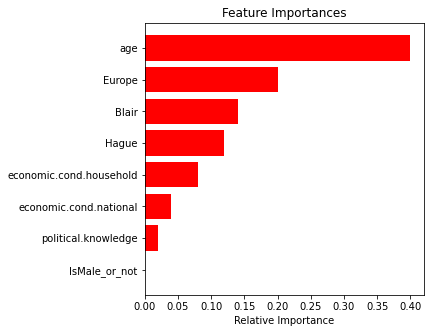

In [69]:
importances = ADB_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

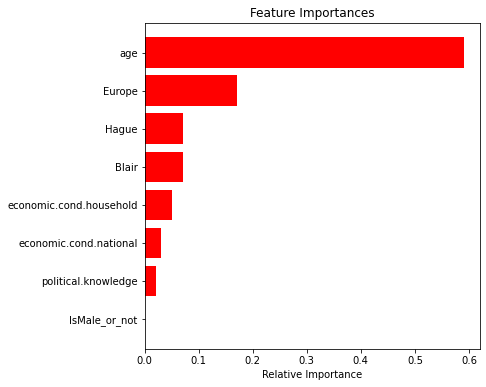

In [70]:
importances = ADB_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [189]:
# Model Tuning on Gradient Boost Classifier

In [71]:
# Choose the type of classifier. 
gbcl_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbcl_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbcl_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbcl_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [72]:
gbcl_tuned_score=get_metrics_score(gbcl_tuned)

Accuracy on training set :  0.8737040527803959
Accuracy on test set :  0.8333333333333334
Recall on training set :  0.9350132625994695
Recall on test set :  0.9075907590759076
Precision on training set :  0.8924050632911392
Precision on test set :  0.8513931888544891


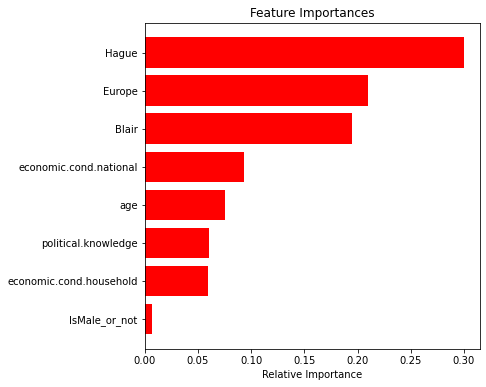

In [73]:
importances = gbcl_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report. Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

In [ ]:
# Cross Validation
# Logistic Regression

In [74]:
from sklearn.model_selection import cross_val_score
LR_model_CV = LogisticRegression()
scores = cross_val_score(LR_model_CV, X_train, y_train, cv=10)
np.mean(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8312995944277907

In [75]:
scores = cross_val_score(LR_model_CV, X_train, y_train, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.82242991, 0.77358491, 0.83962264, 0.86792453, 0.85849057,
       0.8490566 , 0.81132075, 0.8490566 , 0.81132075, 0.83018868])

In [76]:
scores = cross_val_score(LR_model_CV, X_test, y_test, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.80434783, 0.7826087 , 0.84782609, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.73333333, 0.82222222])

In [77]:
# Linear Discriminant Analysis

In [78]:
LDA_model_CV= LinearDiscriminantAnalysis()
scores = cross_val_score(LDA_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.8256656674307882

In [79]:
scores = cross_val_score(LDA_model_CV, X_train, y_train, cv=10)
scores


array([0.79439252, 0.77358491, 0.83962264, 0.85849057, 0.85849057,
       0.8490566 , 0.80188679, 0.8490566 , 0.81132075, 0.82075472])

In [80]:
scores = cross_val_score(LDA_model_CV, X_test, y_test, cv=10)
scores

array([0.80434783, 0.76086957, 0.86956522, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.75555556, 0.84444444])

In [201]:
# KNN Model

In [81]:
KNN_model_CV=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
scores = cross_val_score(KNN_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.7766002468700406

In [82]:
KNN_model_CV=KNeighborsClassifier()
scores = cross_val_score(KNN_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.7945247751719273

In [83]:
scores = cross_val_score(KNN_model_CV, X_train, y_train, cv=10)
scores

array([0.80373832, 0.78301887, 0.76415094, 0.80188679, 0.82075472,
       0.81132075, 0.79245283, 0.82075472, 0.77358491, 0.77358491])

In [84]:
scores = cross_val_score(KNN_model_CV, X_test, y_test, cv=10)
scores

array([0.76086957, 0.82608696, 0.80434783, 0.7173913 , 0.82608696,
       0.82608696, 0.82222222, 0.8       , 0.75555556, 0.73333333])

In [ ]:
# Naive Bayes Model

In [87]:
NB_model_CV = GaussianNB()
scores = cross_val_score(NB_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.8284870393228706

In [88]:
scores = cross_val_score(NB_model_CV, X_train, y_train, cv=10)
scores

array([0.80373832, 0.78301887, 0.8490566 , 0.83962264, 0.90566038,
       0.8490566 , 0.78301887, 0.83962264, 0.81132075, 0.82075472])

In [89]:
scores = cross_val_score(NB_model_CV, X_test, y_test, cv=10)
scores

array([0.7826087 , 0.80434783, 0.86956522, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.82222222, 0.75555556, 0.82222222])

In [209]:
# Bagging

In [90]:
Bagging_model_CV=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
scores = cross_val_score(Bagging_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.8322253570798802

In [212]:
scores = cross_val_score(Bagging_model_CV, X_train, y_train, cv=10)
scores

array([0.8411215 , 0.81132075, 0.85849057, 0.8490566 , 0.90566038,
       0.79245283, 0.83018868, 0.81132075, 0.79245283, 0.83018868])

In [91]:
scores = cross_val_score(Bagging_model_CV, X_test, y_test, cv=10)
scores

array([0.7826087 , 0.76086957, 0.84782609, 0.73913043, 0.86956522,
       0.84782609, 0.84444444, 0.8       , 0.73333333, 0.77777778])

In [ ]:
# Ada Boost Classifier

In [92]:
ADB_model_CV = AdaBoostClassifier(n_estimators=100,random_state=1)
scores = cross_val_score(ADB_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.8237700581907952

In [93]:
scores = cross_val_score(ADB_model_CV, X_train, y_train, cv=10)
scores

array([0.80373832, 0.79245283, 0.83018868, 0.85849057, 0.89622642,
       0.81132075, 0.78301887, 0.83018868, 0.78301887, 0.8490566 ])

In [94]:
scores = cross_val_score(ADB_model_CV, X_test, y_test, cv=10)
scores

array([0.7173913 , 0.7173913 , 0.80434783, 0.69565217, 0.86956522,
       0.82608696, 0.91111111, 0.75555556, 0.68888889, 0.8       ])

In [ ]:
# Gradient Boost Classifier

In [95]:
gbcl_model_CV = GradientBoostingClassifier(random_state=1)
scores = cross_val_score(gbcl_model_CV, X_train, y_train, cv=10)
np.mean(scores)

0.8312731440663024

In [96]:
scores = cross_val_score(gbcl_model_CV, X_train, y_train, cv=10)
scores

array([0.85046729, 0.80188679, 0.81132075, 0.8490566 , 0.88679245,
       0.83962264, 0.81132075, 0.83962264, 0.76415094, 0.85849057])

In [97]:
scores = cross_val_score(gbcl_model_CV, X_test, y_test, cv=10)
scores

array([0.73913043, 0.73913043, 0.86956522, 0.73913043, 0.82608696,
       0.84782609, 0.86666667, 0.82222222, 0.68888889, 0.75555556])

In [ ]:
# Compare all Models

In [104]:
# defining list of models
models = [LR_model, LR_model_tuned, LDA_model, KNN_model, NB_model, Bagging_model, ADB_model, ADB_tuned, gbcl_model, gbcl_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [105]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with default parameters','Logistic Regression Tuned', 
                                          'LDA Model','KNN Model',
                                          'Naive Bayes Model','Bagging Model','Adaboost Model with default parameters', 'Adaboost Model Tuned', 'Gradient Boost Model with default parameters', 'Gradient Boost Model Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression with default parameters,0.83,0.84,0.91,0.88,0.86,0.87
1,Logistic Regression Tuned,0.83,0.84,0.91,0.88,0.86,0.87
2,LDA Model,0.83,0.83,0.91,0.89,0.86,0.86
3,KNN Model,0.85,0.80,0.93,0.89,0.87,0.83
4,Naive Bayes Model,0.84,0.82,0.90,0.87,0.88,0.87
5,Bagging Model,0.97,0.83,0.99,0.90,0.96,0.85
6,Adaboost Model with default parameters,0.85,0.81,0.91,0.88,0.88,0.84
7,Adaboost Model Tuned,0.85,0.81,0.91,0.88,0.88,0.85
8,Gradient Boost Model with default parameters,0.89,0.84,0.94,0.91,0.91,0.85
9,Gradient Boost Model Tuned,0.87,0.83,0.94,0.91,0.89,0.85


In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [103]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# NB Classifier

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [53]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [54]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



the auc 0.888 


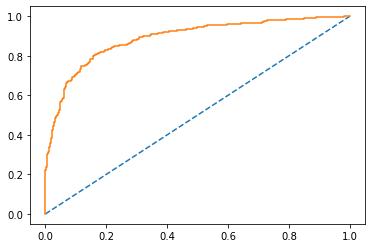

In [55]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [56]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



the auc curve 0.876 


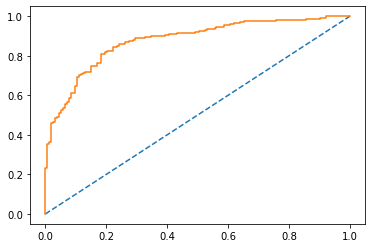

In [57]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [58]:
# KNN

In [60]:
x=df1.drop("IsLabour_or_not",axis=1)

y=df1["IsLabour_or_not"]

In [61]:
x.head()


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [62]:
from scipy.stats import zscore

In [63]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [64]:
x.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536
5,-0.461328,-0.278185,0.926367,0.565802,1.014951,-0.830902,0.423832,1.067536
6,0.175754,-1.412613,-1.222408,0.565802,1.014951,1.291625,0.423832,1.067536
7,1.449918,-0.278185,0.926367,0.565802,-1.419969,-1.740556,-1.421084,1.067536
8,-0.970994,-0.278185,-0.148020,0.565802,1.014951,1.291625,-1.421084,-0.936736
9,1.003961,-0.278185,-1.222408,1.417312,-1.419969,1.291625,0.423832,1.067536


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [68]:
print(KNN_model_score)

0.8566402814423922


In [69]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[232  95]
 [ 68 742]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       327
           1       0.89      0.92      0.90       810

    accuracy                           0.86      1137
   macro avg       0.83      0.81      0.82      1137
weighted avg       0.85      0.86      0.85      1137



In [70]:
# AUC ROC Curve KNN Train

the auc 0.929 


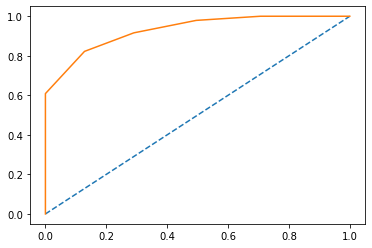

In [71]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [72]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.8263157894736842


In [73]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 91  42]
 [ 24 223]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       133
           1       0.84      0.90      0.87       247

    accuracy                           0.83       380
   macro avg       0.82      0.79      0.80       380
weighted avg       0.82      0.83      0.82       380



In [74]:
# AUC ROC Curve KNN Test

the auc curve 0.868 


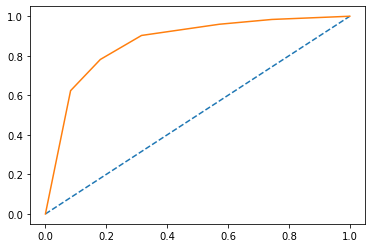

In [75]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [76]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8504837291116975
[[230  97]
 [ 73 737]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       327
           1       0.88      0.91      0.90       810

    accuracy                           0.85      1137
   macro avg       0.82      0.81      0.81      1137
weighted avg       0.85      0.85      0.85      1137



In [78]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8210526315789474
[[ 92  41]
 [ 27 220]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       133
           1       0.84      0.89      0.87       247

    accuracy                           0.82       380
   macro avg       0.81      0.79      0.80       380
weighted avg       0.82      0.82      0.82       380



In [79]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8566402814423922
[[232  95]
 [ 68 742]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       327
           1       0.89      0.92      0.90       810

    accuracy                           0.86      1137
   macro avg       0.83      0.81      0.82      1137
weighted avg       0.85      0.86      0.85      1137



In [81]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8263157894736842
[[ 91  42]
 [ 24 223]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       133
           1       0.84      0.90      0.87       247

    accuracy                           0.83       380
   macro avg       0.82      0.79      0.80       380
weighted avg       0.82      0.83      0.82       380



In [82]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.2131578947368421,
 0.20526315789473681,
 0.17368421052631577,
 0.17894736842105263,
 0.1763157894736842,
 0.17105263157894735,
 0.17368421052631577,
 0.16842105263157892,
 0.16842105263157892,
 0.16842105263157892]

In [83]:
#AUC ROC curve after n classifier for train data set

the auc curve 0.905 


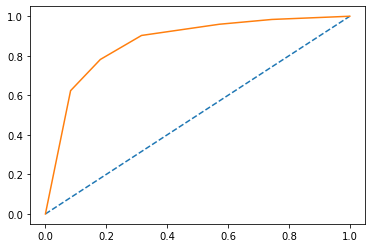

In [84]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [85]:
# AUC ROC curve after n classifier for test data set

the auc curve 0.890 


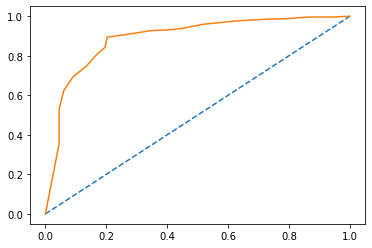

In [86]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

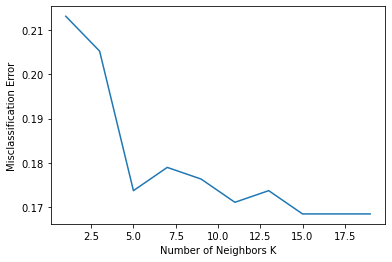

In [87]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [88]:
# Discriminant Analysis

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [91]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [92]:
# AUC ROC curve for LDA Train

the auc 0.889 


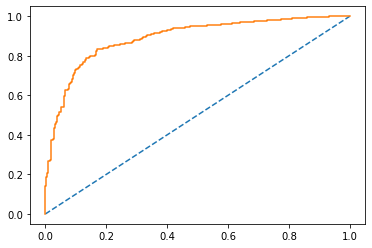

In [93]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [94]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [95]:
# AUC ROC curve for LDA Test

the auc curve 0.888 


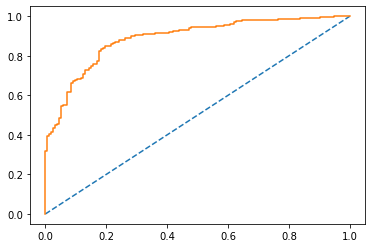

In [96]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [97]:
# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [99]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [100]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8312912346842601
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [101]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.931825,0.068175
1,0.096984,0.903016
2,0.298416,0.701584
3,0.110210,0.889790
4,0.017223,0.982777


In [102]:
Logistic_model.score(X_train,Y_train)

0.8312912346842601

In [103]:
# AUC ROC curve for Logistic Regression Train

AUC: 0.890


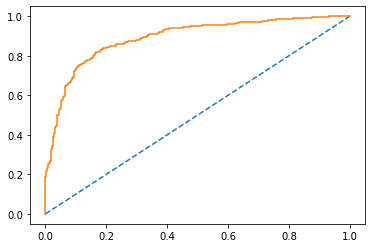

In [104]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [105]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [106]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593


In [107]:
# AUC ROC curve for Logistic Regression Test

AUC: 0.883


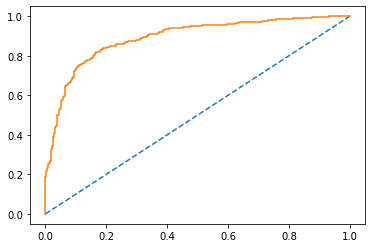

In [108]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [109]:
# Model tuning # Bagging Train

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [113]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [114]:
# AUC _ROC Curve Bagging Train

AUC: 1.000


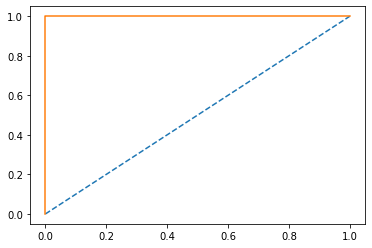

In [115]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [116]:
# Bagging Test

In [117]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [118]:
# AUC _ROC Curve Bagging Test

AUC: 0.881


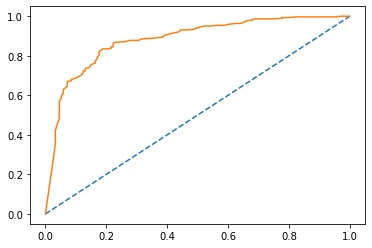

In [119]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [120]:
# Boosting Train

In [121]:
# Ada Boost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [124]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.915


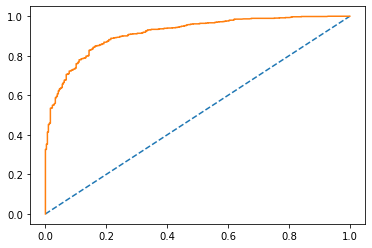

In [125]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [126]:
# Gradient Boosting

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [128]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8925541941564562
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [129]:
# AUC _ROC Curve Boosting Train

AUC: 0.951


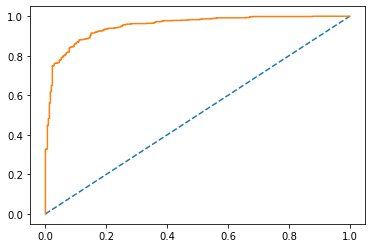

In [130]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [131]:
# ADA Boosting Test

In [132]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8135964912280702
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [133]:
#AUC _ROC Curve Boosting Test

AUC: 0.877


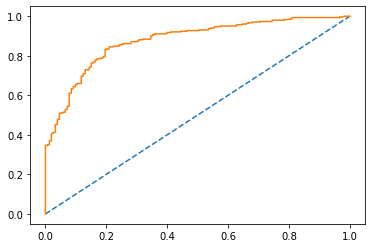

In [134]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [135]:
# Gradient Boosting Test

In [136]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8355263157894737
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [137]:
# Gradient Boosting AUC_ROC Curve Test

AUC: 0.899


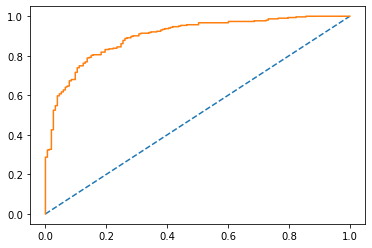

In [138]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)